# Exploring PCA (Principal component analysis)
https://www.youtube.com/watch?v=Lsue2gEM9D0&list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF

In [2]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn import preprocessing

In [3]:
genes = [f"gene_{i}" for i in range(1, 101)]

# wild type
wt = [f"wt{i}" for i in range(1, 6)]
# knock out
ko = [f"ko{i}" for i in range(1, 6)]

data = pd.DataFrame(columns=[*wt, *ko], index=genes)

In [49]:
for gene in data.index:
    data.loc[gene,'wt1':'wt5'] = np.random.poisson(lam=random.randrange(10,1000), size=5)
    data.loc[gene,'ko1':'ko5'] = np.random.poisson(lam=random.randrange(10,1000), size=5)

print(data.shape)
data.head()

(100, 10)


,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene_1,841,883,876,797,874,619,602,596,601,620
gene_2,391,332,360,356,350,326,288,355,303,305
gene_3,823,892,818,927,858,69,73,76,76,91
gene_4,230,220,202,216,213,107,108,99,118,95
gene_5,225,210,230,228,262,464,436,400,406,446


In [61]:
data.std(axis=1)

gene_1      132.356799
gene_2       31.665614
gene_3      415.760628
gene_4       59.090890
gene_5      107.378924
               ...    
gene_96     221.807825
gene_97     311.586906
gene_98     186.550589
gene_99     328.809908
gene_100     95.642912
Length: 100, dtype: float64

In [64]:
scaled_data = preprocessing.scale(data.T)
scaled_data.shape

(10, 100)

In [67]:
scaled_data.std(), scaled_data.mean()

(1.0, 0.0)

In [68]:
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

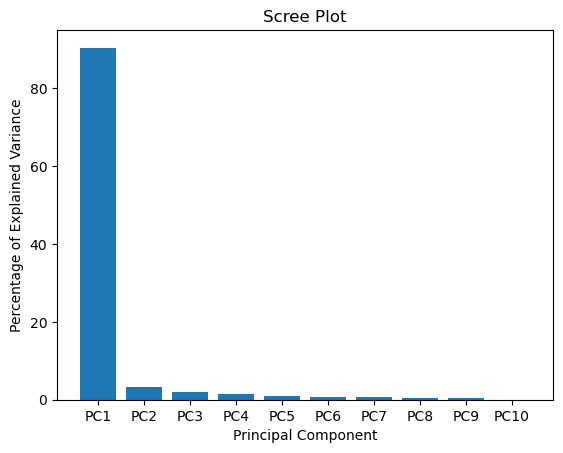

In [69]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

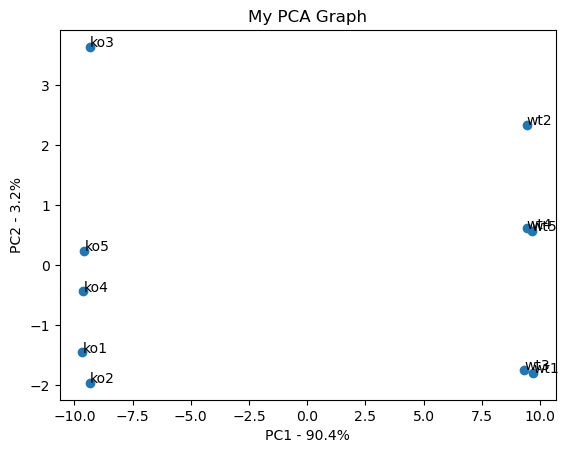

In [70]:
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)
 
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
 
plt.show()

In [71]:
## get the name of the top 10 measurements (genes) that contribute
## most to pc1.
## first, get the loading scores
loading_scores = pd.Series(pca.components_[0], index=genes)
## now sort the loading scores based on their magnitude
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
 
# get the names of the top 10 genes
top_10_genes = sorted_loading_scores[0:10].index.values
 
## print the gene names and their scores (and +/- sign)
print(loading_scores[top_10_genes])

gene_79   -0.105112
gene_25    0.105094
gene_30   -0.105086
gene_47   -0.105083
gene_49   -0.105080
gene_11   -0.105071
gene_39   -0.105069
gene_42    0.105064
gene_97   -0.105059
gene_76    0.105054
dtype: float64
